## Lalama IV: It Gets Easier

Alright.

I showed you all that stuff I just showed because you probably will have to use it one day if you do any kind of coding.

But for most analyses we do, somebody already wrote code that does that analysis.

We can just use the great code that they wrote and that thousands of other people have already tested and improved.

Now we're standing on the shoulder of giants! Or something like that.

## numpy: like Matlab in Python

**numpy** is a library that provides matrix-like structures that many scientists use.

It extends **slice notation** so that we can refer to rows and columns of a matrix.

It also implements many functions that Matlab users will be familiar with.

```Python
import numpy as np
zero_arr = np.zeros((10,10)) # creates a 10 by 10 array / matrix of zeros
print(zero_arr[5,5])
>>> 0
```

We can rewrite our mean and standard deviation dictionary functions using numpy functions.

** These functions are much faster, especially when dealing with large datasets, because numpy is a Python wrapper around very efficient scientific computing libraries written in speedy languages like Fortran and C **

In [24]:
import numpy as np

def compute_mouse_dict_mean_and_std(mouse_dict):
    """
    takes mouse_dict returned by make_mouse_dict
    and computes mean for each strain.
    returns mean_mouse_dict.
    """
    mean_mouse_dict = {}
    stdev_mouse_dict = {}
    
    for key,val in mouse_dict.items():
        mean_mouse_dict[key] = np.mean(val)
        stddev_mouse_dict[key] = np.std(val)
    return mean_mouse_dict,stdev_mouse_dict

So I didn't tell you ... but I made a package out of the functions we wrote already.

It's called "pyjax".

Basically it's two modules (AKA) files ...

plus a completely empty text file called `__init__.py` ...
 
inside a folder called `pyjax`.

That's the basics of how you make a package in Python.

Make a folder, and then put an empty `__init__.py` file inside of it with your modules.

As long as that folder is on your `$PATH`, then the Python interpreter will find it and recognize it as a package.

So you can do the same with your own code.

## Using a package that you've created in Jupyter

Again, if the package is on your path, or if it's in the folder you're working from, the Python kernel in a Jupyter notebook should be able to find it.

Here's everything we've done so far, now with numpy goodness we just added, in three lines.

In [23]:
import pyjax.csv
import pyjax.utils

STRAIN_IND = 0
VALUE_IND = 12
CSV_FILE = 'Willott1_table-1.csv'

parsed_file = pyjax.csv.parse(CSV_FILE)
sorted_by_strain = pyjax.utils.sort_by_strain(parsed_file,STRAIN_IND,VALUE_IND)
strain_means, strain_std_devs = pyjax.utils.compute_strain_mean_and_std(sorted_by_strain)

## matplotlib: like `MATLAB` graphs in Python

matploblib is a library for plotting.

There is a `pyplot` module in matplotlib that uses almost verbatim the syntax from `MATLAB`.

Let's use it now to plot our data.

First we need to put our values in lists (like you would put them into a vector to plot something in MATLAB).

In [54]:
# need to get means and std. deviations into lists
strain_names_sorted = sorted(strain_means.keys())
means_sorted_by_strain = [strain_means[key] for key in strain_names_sorted]
std_devs_sorted_by_strain = [strain_std_devs[key] for key in strain_names_sorted]

Now we sort the mean ASR values (like you would do with MATLAB sort).

Numpy has a `sort` function that sorts an array in place.

Unlike `MATLAB` it uses a separate `argsort` function to returns the indices you would use to sort the array (`MATLAB` returns the indices automatically from its `sort`, but we don't always need them.)

We want the indices for sorting here so we can use them with the array of standard deviations and with the list of strain names.

In [59]:
import numpy as np
sort_by_ASR_inds = np.argsort(means_sorted_by_strain)

Now we can sort everything by increasing value of mean ASR using those indices.

This will make our plot readable.

And also useful.

In [60]:
means_sorted_by_asr = np.asarray(means_sorted_by_strain)[sort_by_ASR_inds]
std_devs_sorted_by_asr = np.asarray(std_devs_sorted_by_strain)[sort_by_ASR_inds]
strain_names_sorted_by_asr = [strain_names_sorted[ind] for ind in sort_by_ASR_inds]

We import matplotlib.

Notice the line magic command that lets us show plots 'in-line' (in the notebook) instead of having them open in another window.

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

then we plot:

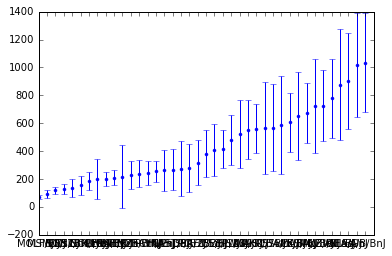

In [71]:
dummy_x_values = range(len(means_sorted_by_asr))
plt.figure()
plt.errorbar(dummy_x_values,means_sorted_by_asr,std_devs_sorted_by_asr,fmt='b.')
plt.xticks(dummy_x_values,strain_names_sorted_by_asr)
plt.show()

## pandas: it gets even easier

Let's use the **pandas** library to do the heavy lifting of importing csv files.

**pandas** allows us to work with objects called **dataframes** that you may be familiar with if you have ever used the statistical programming language R.

`pandas` is built on top of `numpy` and `matplotlib` to make it even more convenient to work with your data.

In [ ]:
import pandas as pd

filename = 'Willott1_table-1.csv'
df = pd.read_csv(filename,skiprows=6,header=0) # df is short for 'dataframe'

In [ ]:
df.head() # head method shows the first few rows

In [ ]:
%matplotlib inline
df.boxplot(column='ASR_100',by='strain',rot=45,figsize=(12,10))

In [ ]:
# borrowed from http://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/

# use dict comprehension to create new dataframe from the iterable groupby object
# each group name becomes a column in the new dataframe
df2 = pd.DataFrame({col:vals['ASR_100'] for col, vals in df.groupby('strain')})
# find and sort the median values in this new dataframe
meds = df2.median().sort_values()
# use the columns in the dataframe, ordered sorted by median value
# return axes so changes can be made outside the function
ax = df2[meds.index].boxplot(rot=45, return_type="axes")